# Import Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.palettes import desaturate
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score , f1_score
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
sns.set()

#Import Data

In [2]:
data = pd.read_csv(r'/content/Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


#EDA

### Discovring The Data

In [3]:
data.shape

(4653, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


### Check balance in target variable

In [5]:
# check distribution of target_class column
data['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [6]:
# view the percentage distribution of target_class column
data['LeaveOrNot'].value_counts()/np.float(len(data))

<ipython-input-6-4d675ce3e311>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['LeaveOrNot'].value_counts()/np.float(len(data))


0    0.656136
1    0.343864
Name: LeaveOrNot, dtype: float64

we can see that the ratio between the minority class is 1:2 so it is smaller than 1:4 so we don't have imbalanced problem

### Check for missing_value

In [7]:
# check for missing values in variables
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [8]:
#discovering the data of each coulmn
print("Education is ", data['Education'].unique())
print("JoiningYear is ", data['JoiningYear'].unique())
print("City is ", data['City'].unique())
print("PaymentTier is ", data['PaymentTier'].unique())
print("Age is  ", data['Age'].unique())
print("Gender is ", data['Gender'].unique())
print("EverBenched is ", data['EverBenched'].unique())
print("ExperienceInCurrentDomain is ", data['ExperienceInCurrentDomain'].unique())
print("LeaveOrNot is ", data['LeaveOrNot'].unique())


Education is  ['Bachelors' 'Masters' 'PHD']
JoiningYear is  [2017 2013 2014 2016 2015 2012 2018]
City is  ['Bangalore' 'Pune' 'New Delhi']
PaymentTier is  [3 1 2]
Age is   [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender is  ['Male' 'Female']
EverBenched is  ['No' 'Yes']
ExperienceInCurrentDomain is  [0 3 2 5 1 4 7 6]
LeaveOrNot is  [0 1]


We can see that there are no missing values in the dataset

### Check for duplicates

In [9]:
#Dublicating check
duplicates_rows = data[data.duplicated()]

print ("#####################duplicated rows are#####################")
duplicates_rows

#####################duplicated rows are#####################


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


there are 1889 duplicated values

### Check for multicollinearity

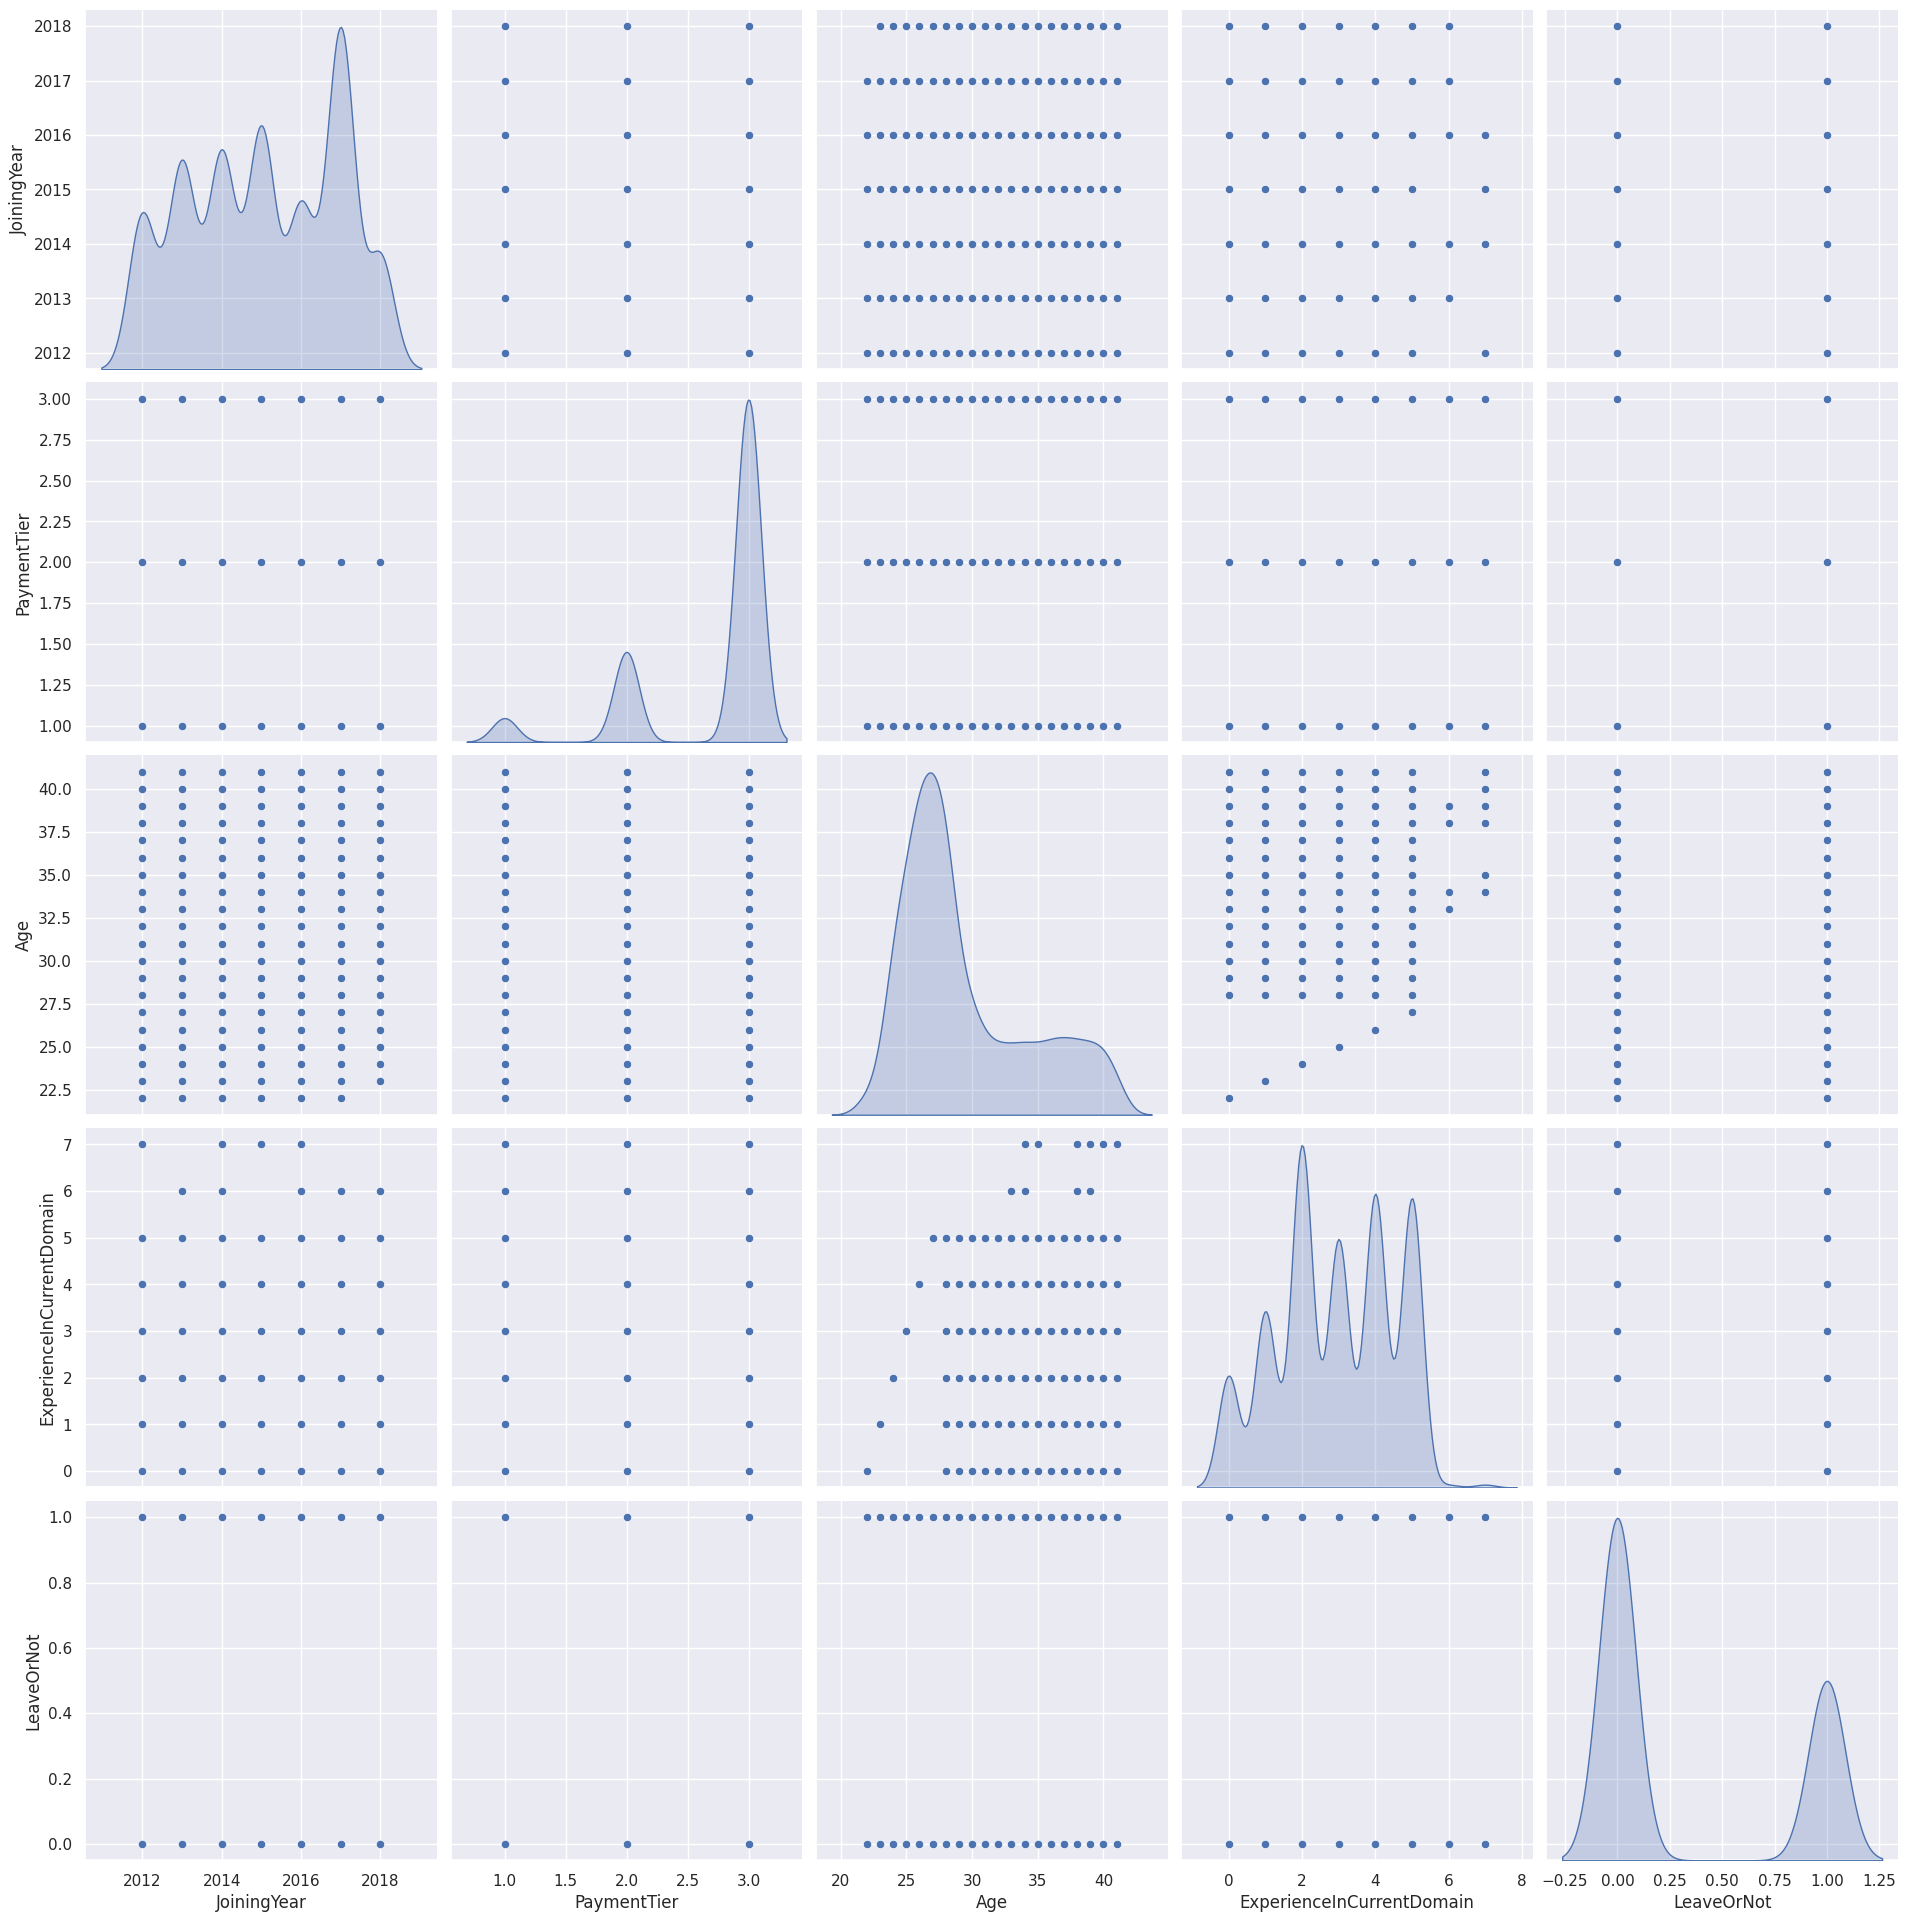

In [10]:
#Check for multicollinearity using Scatter Matrix
scatter_matrix = sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 1})
scatter_matrix.fig.set_size_inches(20, 20)
plt.show()

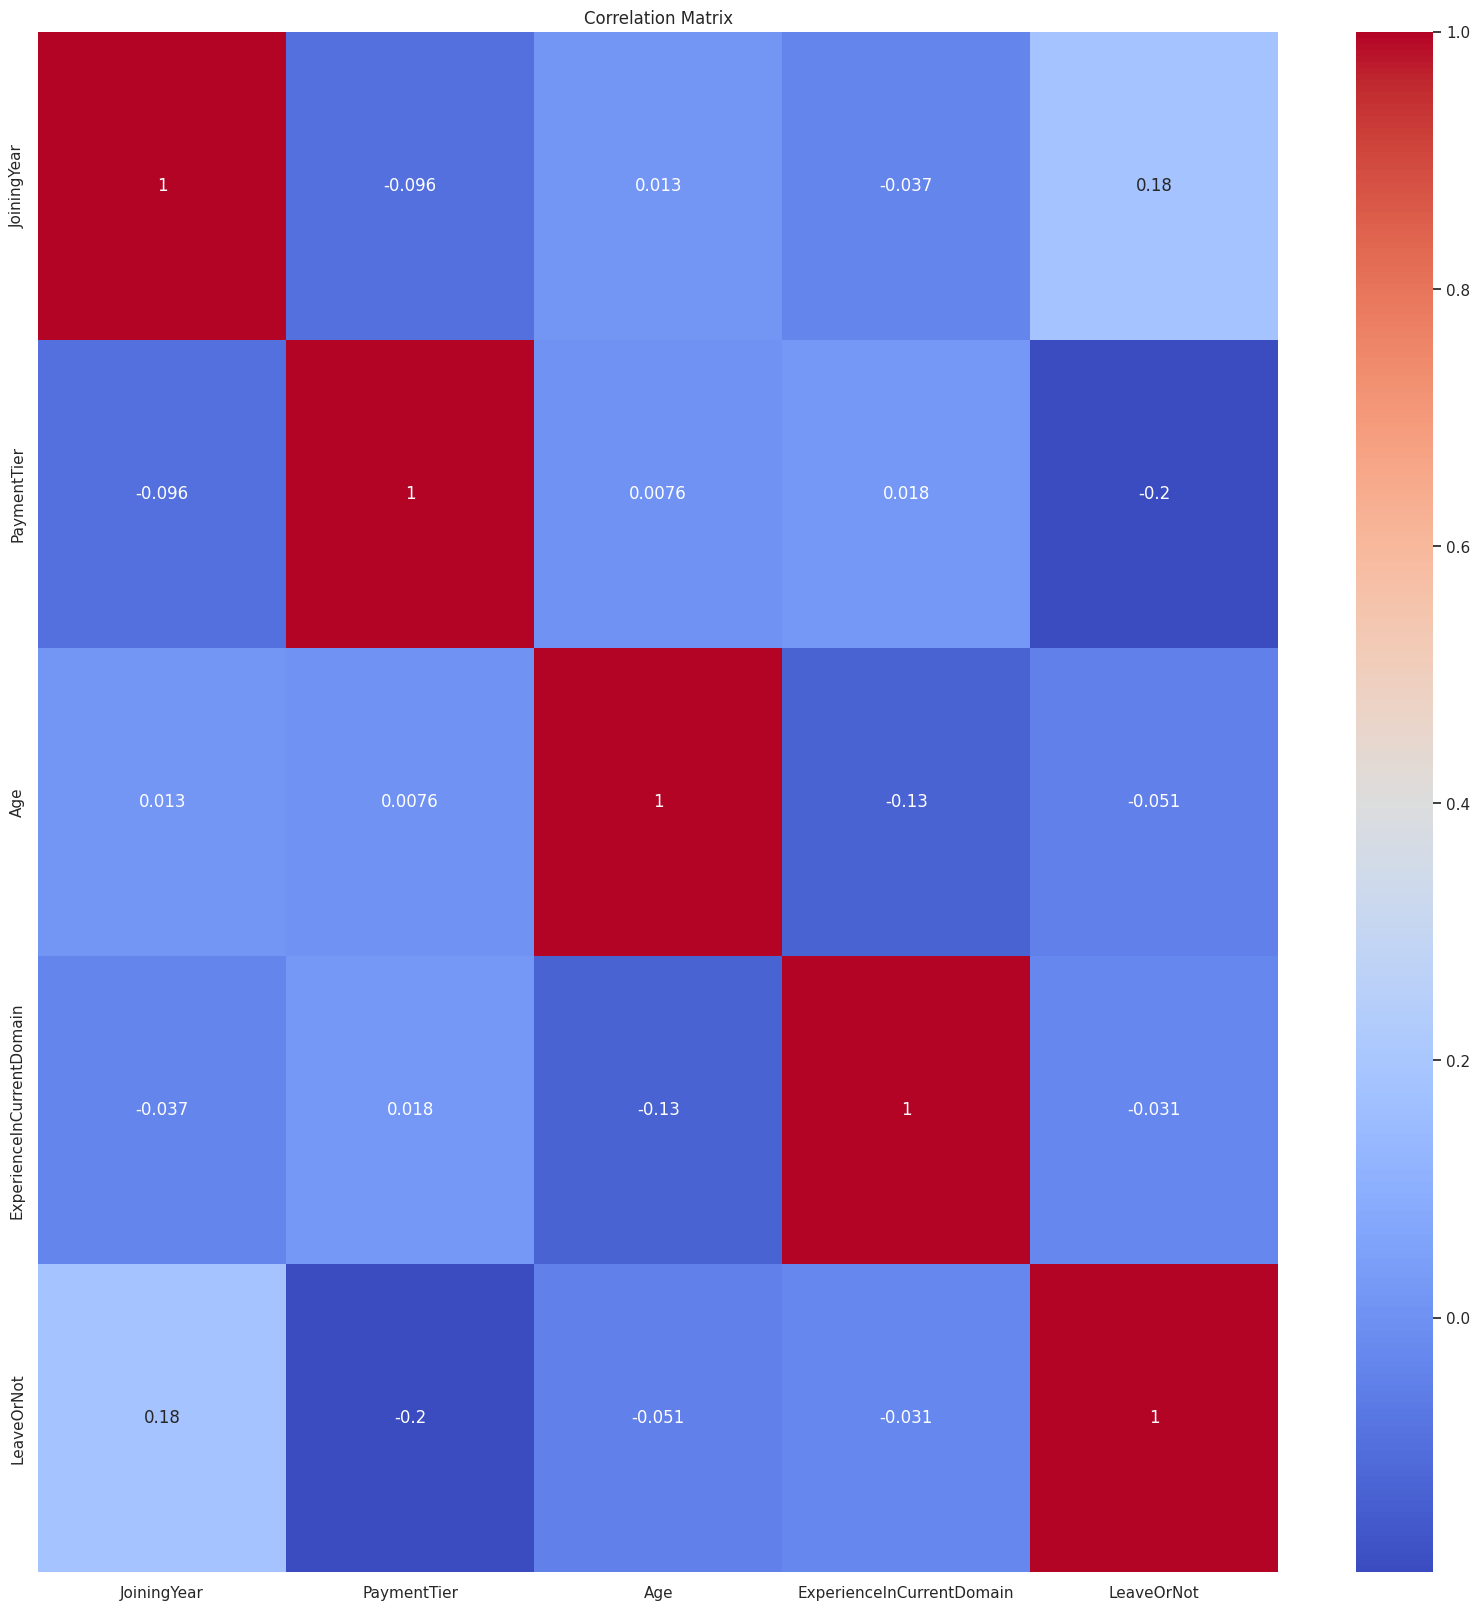

In [11]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

we note that there is not where any  multicollinearity

##EDA For Categorical Features

### univariate analysis for categorical variable

#### (First_CAT "Education")

In [12]:
data['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

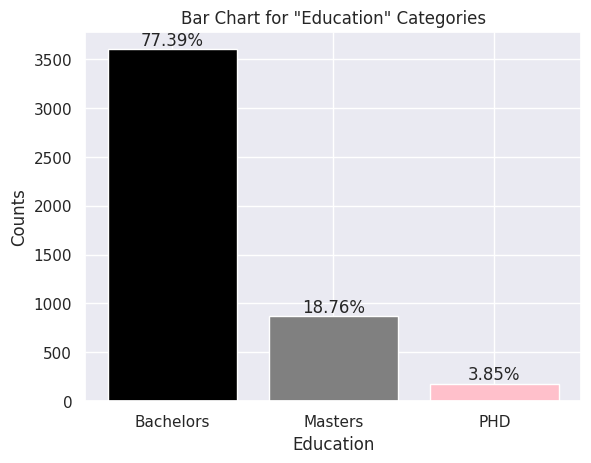

In [13]:
Education_counts = data['Education'].value_counts()

# Calculate the total count of education categories
total_count = Education_counts.sum()

# Create bar chart
plt.bar(Education_counts.index, Education_counts.values, color=['black', 'gray','pink'])

# Add the percentage labels
for i, count in enumerate(Education_counts.values):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('Bar Chart for "Education" Categories')

# Display the chart
plt.show()

we note that the largest num of Employee's Education is Bachelorse

####(secound_CAT "City")

In [14]:
data['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

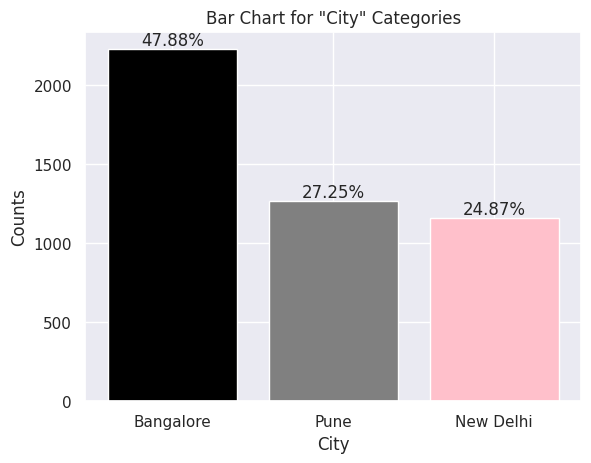

In [15]:
City_counts = data['City'].value_counts()

# Calculate the total count of City categories
total_count = City_counts.sum()

# Create bar chart
plt.bar(City_counts.index, City_counts.values, color=['black', 'gray','pink'])

# Add the percentage labels
for i, count in enumerate(City_counts.values):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('City')
plt.ylabel('Counts')
plt.title('Bar Chart for "City" Categories')

# Display the chart
plt.show()

we note that the largest num of Employee's City is Bangalore

####(Third_CAT "Payment Tier")

In [16]:
data['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

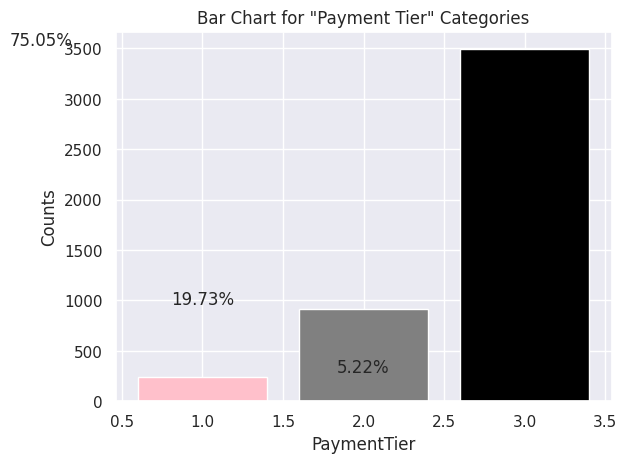

In [17]:
PaymentTier_counts = data['PaymentTier'].value_counts()

# Calculate the total count of PaymentTier categories
total_count = PaymentTier_counts.sum()

# Create bar chart
plt.bar(PaymentTier_counts.index, PaymentTier_counts.values, color=['black', 'gray','pink'])

# Add the percentage labels
for i, count in enumerate(PaymentTier_counts.values):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('PaymentTier')
plt.ylabel('Counts')
plt.title('Bar Chart for "Payment Tier" Categories')

# Display the chart
plt.show()

we note that the largest num of Employee's Payment Tier type is 3

(Fourth_CAT "Gender")

In [18]:
data['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

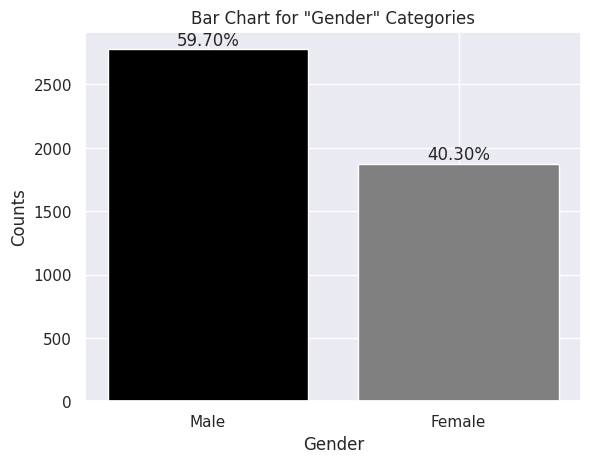

In [19]:
Gender_counts = data['Gender'].value_counts()

# Calculate the total count of Gender categories
total_count = Gender_counts.sum()

# Create bar chart
plt.bar(Gender_counts.index, Gender_counts.values, color=['black', 'gray'])

# Add the percentage labels
for i, count in enumerate(Gender_counts.values):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Bar Chart for "Gender" Categories')

# Display the chart
plt.show()

we note that the largest num of Employee's Gender is Male

####(Fourth_CAT "Ever Benched")

In [20]:
data['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

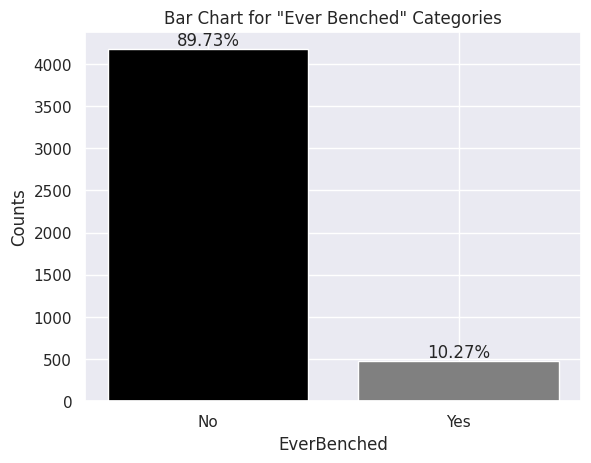

In [21]:
EverBenched_counts = data['EverBenched'].value_counts()

# Calculate the total count of EverBenched categories
total_count = EverBenched_counts.sum()

# Create bar chart
plt.bar(EverBenched_counts.index, EverBenched_counts.values, color=['black', 'gray'])

# Add the percentage labels
for i, count in enumerate(EverBenched_counts.values):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('EverBenched')
plt.ylabel('Counts')
plt.title('Bar Chart for "Ever Benched" Categories')

# Display the chart
plt.show()

we note that the largest num of Ever Banched state is not Ever Banched

### Chi_squre Test

#### (Education,LeaveOrNot)

In [22]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['Education'], data['LeaveOrNot'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The  feature is significantly associated with the categorical target.")
else:
    print("The  feature is not significantly associated with the categorical target.")

contingency_table:
LeaveOrNot     0     1
Education             
Bachelors   2472  1129
Masters      447   426
PHD          134    45
Chi-square statistic: 101.83014138498626
P-value: 7.724417739147332e-23
Degrees of freedom: 2
Expected frequencies:
[[2362.74511068 1238.25488932]
 [ 572.8065764   300.1934236 ]
 [ 117.44831292   61.55168708]]
The  feature is significantly associated with the categorical target.


####(City,LeaveOrNot)

In [23]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['City'], data['LeaveOrNot'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The  feature is significantly associated with the categorical target.")
else:
    print("The  feature is not significantly associated with the categorical target.")

contingency_table:
LeaveOrNot     0    1
City                 
Bangalore   1633  595
New Delhi    791  366
Pune         629  639
Chi-square statistic: 206.15885400194648
P-value: 1.7106992135618012e-45
Degrees of freedom: 2
Expected frequencies:
[[1461.8706211   766.1293789 ]
 [ 759.14915109  397.85084891]
 [ 831.98022781  436.01977219]]
The  feature is significantly associated with the categorical target.


####(PaymentTier,LeaveOrNot)

In [24]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['PaymentTier'], data['LeaveOrNot'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The  feature is significantly associated with the categorical target.")
else:
    print("The  feature is not significantly associated with the categorical target.")

contingency_table:
LeaveOrNot      0    1
PaymentTier           
1             154   89
2             368  550
3            2531  961
Chi-square statistic: 338.6305486794045
P-value: 2.9329904732261673e-74
Degrees of freedom: 2
Expected frequencies:
[[ 159.4410058    83.5589942 ]
 [ 602.33268859  315.66731141]
 [2291.22630561 1200.77369439]]
The  feature is significantly associated with the categorical target.


####(Gender,LeaveOrNot)

In [25]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['Gender'], data['LeaveOrNot'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The  feature is significantly associated with the categorical target.")
else:
    print("The  feature is not significantly associated with the categorical target.")

contingency_table:
LeaveOrNot     0    1
Gender               
Female       991  884
Male        2062  716
Chi-square statistic: 225.6953561969211
P-value: 5.177873883438753e-51
Degrees of freedom: 1
Expected frequencies:
[[1230.2546744  644.7453256]
 [1822.7453256  955.2546744]]
The  feature is significantly associated with the categorical target.


####(EverBenched,LeaveOrNot)

In [26]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['EverBenched'], data['LeaveOrNot'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The  feature is significantly associated with the categorical target.")
else:
    print("The  feature is not significantly associated with the categorical target.")

contingency_table:
LeaveOrNot      0     1
EverBenched            
No           2792  1383
Yes           261   217
Chi-square statistic: 28.086147926708364
P-value: 1.1603340647939294e-07
Degrees of freedom: 1
Expected frequencies:
[[2739.36707501 1435.63292499]
 [ 313.63292499  164.36707501]]
The  feature is significantly associated with the categorical target.


All Categorcal Data Are significantly associated

## EDA For Date Features

In [27]:
data['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

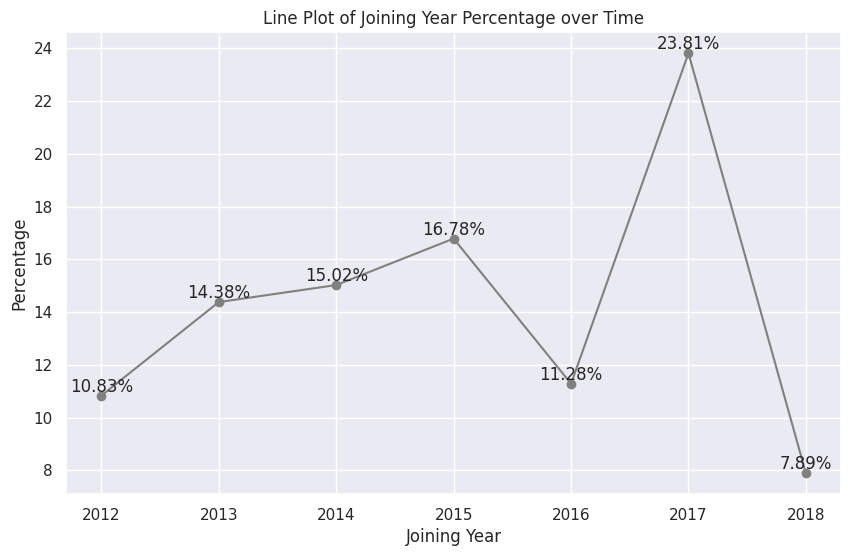

In [28]:
import matplotlib.pyplot as plt

JoiningYear = data['JoiningYear']

# Calculate the count of JoiningYear for each year
year_counts = JoiningYear.value_counts().sort_index()

# Calculate the percentage for each JoiningYear
year_percentages = year_counts / year_counts.sum() * 100

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
ax.plot(year_percentages.index, year_percentages.values, marker='o', linestyle='-', color='gray')

# Add the percentage labels for each data point
for x, y in zip(year_percentages.index, year_percentages.values):
    ax.text(x, y, f'{y:.2f}%', ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Joining Year')
ax.set_ylabel('Percentage')
ax.set_title('Line Plot of Joining Year Percentage over Time')

# Display the line plot
plt.show()

we note that the hightest joining year is 2017

<Figure size 1000x600 with 0 Axes>

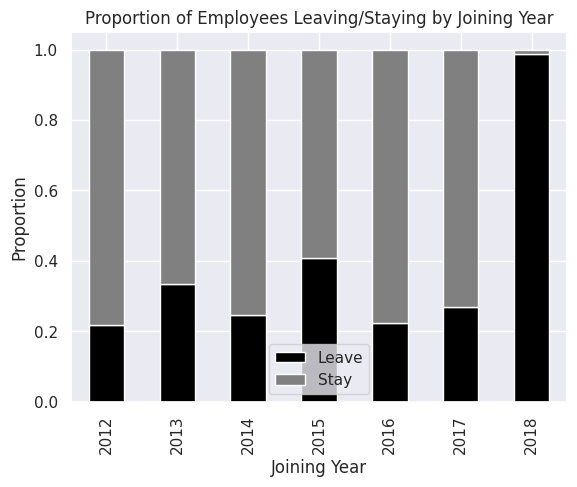

In [29]:
# Group the data by JoiningYear and LeaveOrNot and calculate the counts
grouped_data = data.groupby(['JoiningYear', 'LeaveOrNot']).size().unstack()

# Calculate the proportion of employees leaving and staying in each year
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['LeaveProportion'] = grouped_data[1] / grouped_data['Total']
grouped_data['StayProportion'] = grouped_data[0] / grouped_data['Total']

# Plot the stacked bar plot with custom colors
plt.figure(figsize=(10, 6))
grouped_data[['LeaveProportion', 'StayProportion']].plot(kind='bar', stacked=True, color=['black', 'gray'])
plt.xlabel('Joining Year')
plt.ylabel('Proportion')
plt.title('Proportion of Employees Leaving/Staying by Joining Year')
plt.legend(['Leave', 'Stay'])
plt.show()

we note that almost employees which joining in 2018 , leave  the work

### chi_squre test

In [30]:
# Create a contingency table of the predictor variable and the target variable
contingency_table = pd.crosstab(data['EverBenched'], data['LeaveOrNot'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("contingency_table:")
print( contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The  feature is significantly associated with the categorical target.")
else:
    print("The  feature is not significantly associated with the categorical target.")

contingency_table:
LeaveOrNot      0     1
EverBenched            
No           2792  1383
Yes           261   217
Chi-square statistic: 28.086147926708364
P-value: 1.1603340647939294e-07
Degrees of freedom: 1
Expected frequencies:
[[2739.36707501 1435.63292499]
 [ 313.63292499  164.36707501]]
The  feature is significantly associated with the categorical target.


## EDA For Numerical Variables

### Univariate Analysis

In [31]:
# Select all columns with numeric values
numeric_df = data.select_dtypes(include='number')

# Drop columns that are not included in the analysis or modeling
numeric_df = numeric_df.drop(["JoiningYear", "PaymentTier",'LeaveOrNot'], axis=1)

# Storing 'LeaveOrNot' column in another variable
id = data['LeaveOrNot']

In [32]:
# view summary statistics in numerical variables
round(numeric_df.describe(),2)

,Age,ExperienceInCurrentDomain
count,4653.00,4653.00
mean,29.39,2.91
std,4.83,1.56
min,22.00,0.00
25%,26.00,2.00
50%,28.00,3.00
75%,32.00,4.00
max,41.00,7.00


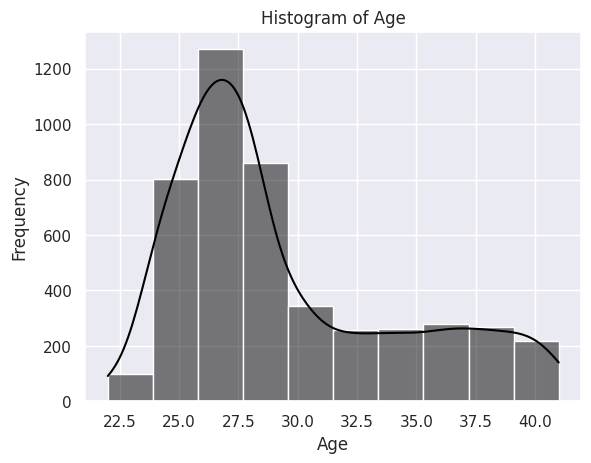

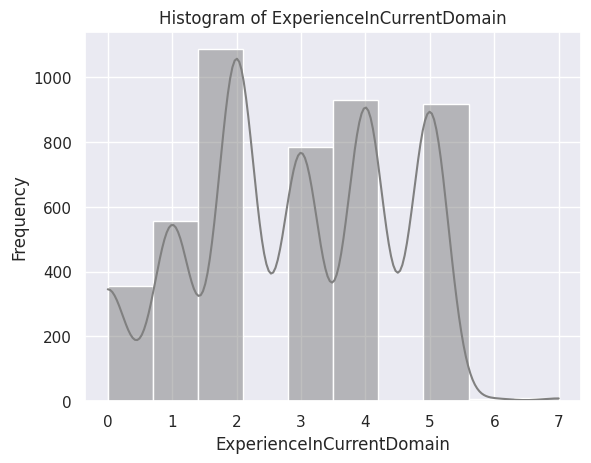

In [33]:
colors = ['black', 'gray']

for i, column in enumerate(numeric_df.columns):
    plt.figure()
    sns.histplot(numeric_df[column], bins=10, kde=True, color=colors[i % len(colors)])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

we note that Age features is skewed

### checking for outliers using Box plot

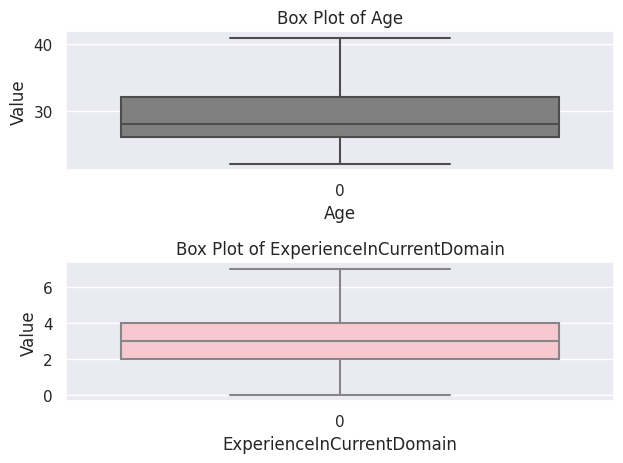

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of colors for each column
colors = ['gray', 'pink']

plt.figure()
for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns), 1, i+1)
    sns.boxplot(numeric_df[column], color=colors[i])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

there is no outliers

### ANOVA Test

####(Age,Leave Or Not)

In [35]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data['Age']
categorical_target = data['LeaveOrNot']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


#### (Experience InCurrent Domain,LeaveOrNot)

In [36]:
# Assuming your data is in a DataFrame called 'data'
numeric_feature = data['ExperienceInCurrentDomain']
categorical_target = data['LeaveOrNot']

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(numeric_feature, categorical_target)

# Check the significance
alpha = 0.05  # Set the significance level
if pvalue < alpha:
    print("The numeric feature is significantly associated with the categorical target.")
else:
    print("The numeric feature is not significantly associated with the categorical target.")

The numeric feature is significantly associated with the categorical target.


All numircal features are significantly associated

# Data Preprossing

## Encodding categorical data

In [37]:
#one hot encoding
data = pd.get_dummies (data,drop_first=True)
data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1


In [38]:
data = data.drop_duplicates()

# Data Modeling

## Data Preparation

In [39]:
# Data Separation as X and Y
Y= data['LeaveOrNot']
X= data.drop('LeaveOrNot',axis=1)

In [40]:
#split the data in training set and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
print('Data:    ',data.shape)
print('----------------')
print('X train: ',X_train.shape)
print('Y train: ',Y_train.shape)
print('----------------')
print('X test:  ',X_test.shape)
print('Y test:  ',Y_test.shape)

Data:     (2764, 11)
----------------
X train:  (2211, 10)
Y train:  (2211,)
----------------
X test:   (553, 10)
Y test:   (553,)


## Feature Scaling

In [42]:
# Define the columns to be rescaled
cols = X_train.columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the selected columns in the training and test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#to transform data from array to data fram
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])



# Applaying the SVM model

In [43]:
# Create an SVM classifier
svm_classifier = svm.SVC()

# Train the model using the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.786618444846293


# Applaying the SVM model From scratch

In [44]:
# Defining the SVM class
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.alphas = None
        self.b = 0

In [45]:
# Implementing the fit() method
def fit(self, X, y, max_iter=100, tol=0.001):
        n_samples, n_features = X.shape

        # Initialize alphas and bias
        self.alphas = np.zeros(n_samples)
        self.b = 0

        # Compute Gram matrix
        K = np.dot(X, X.T)

        # Training loop
        for _ in range(max_iter):
            num_changed_alphas = 0
            for i in range(n_samples):
                E_i = self._decision_function(X[i]) - y[i]
                if (y[i] * E_i < -tol and self.alphas[i] < self.C) or (y[i] * E_i > tol and self.alphas[i] > 0):
                    j = self._select_second_alpha(i, n_samples)
                    E_j = self._decision_function(X[j]) - y[j]

                    alpha_i_old = self.alphas[i].copy()
                    alpha_j_old = self.alphas[j].copy()

                    if y[i] != y[j]:
                        L = max(0, self.alphas[j] - self.alphas[i])
                        H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
                    else:
                        L = max(0, self.alphas[i] + self.alphas[j] - self.C)
                        H = min(self.C, self.alphas[i] + self.alphas[j])

                    if L == H:
                        continue

                    eta = 2.0 * K[i, j] - K[i, i] - K[j, j]
                    if eta >= 0:
                        continue

                    self.alphas[j] -= y[j] * (E_i - E_j) / eta
                    self.alphas[j] = np.clip(self.alphas[j], L, H)

                    if abs(self.alphas[j] - alpha_j_old) < tol:
                        continue

                    self.alphas[i] += y[i] * y[j] * (alpha_j_old - self.alphas[j])

                    b1 = self.b - E_i - y[i] * (self.alphas[i] - alpha_i_old) * K[i, i] - y[j] * (self.alphas[j] - alpha_j_old) * K[i, j]
                    b2 = self.b - E_j - y[i] * (self.alphas[i] - alpha_i_old) * K[i, j] - y[j] * (self.alphas[j] - alpha_j_old) * K[j, j]

                    if 0 < self.alphas[i] < self.C:
                        self.b = b1
                    elif 0 < self.alphas[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2.0

                    num_changed_alphas += 1

            if num_changed_alphas == 0:
                break

In [46]:
# Implementing the _decision_function() method
def _decision_function(self, X):
        return np.dot(self.alphas * y, self._kernel(X)) + self.b

In [47]:
#Implementing the _kernel() method
def _kernel(self, X):
        return np.dot(X, X.T)

In [48]:
#Implementing the _select_second_alpha() method:
def _select_second_alpha(self, i, n_samples):
        j = i
        while j== i:
            j = np.random.randint(0, n_samples)
        return j

In [49]:
# Implementing the predict() method
def predict(self, X):
        return np.sign(self._decision_function(X))

# Run SVM with default hyperparameters

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [50]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7866


In [51]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.7848


In [52]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.7595


In [53]:
# instantiate classifier with rbf kernel and C=10000
svc=SVC(C=10000.0)


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=10000.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with rbf kernel and C=10000.0 : 0.7378


We can see that we can obtain higher accuracy with C=100.0 and, with rbf kernel

###Compare the train-set and test-set accuracy

In [59]:
y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)))


Training-set accuracy score: 0.6843


### Check for overfitting and underfitting

In [60]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, Y_test)))

Training set score: 0.6843
Test set score: 0.6854


The training-set accuracy score is 0.6843 while the test-set accuracy to be 0.6854. These two values are quite comparable. So, there is no question of overfitting.

### Compare model accuracy with null accuracy

In [62]:
# check class distribution in test set
Y_test.value_counts()

0    334
1    219
Name: LeaveOrNot, dtype: int64

In [64]:
# check null accuracy score
null_accuracy = (334/(334+219))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6040


In [54]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,Y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.6890


In [55]:
# instantiate classifier with linear kernel and C=100.0
linear_svc=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc.fit(X_train,Y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test)))

Model accuracy score with linear kernel and C=100.0 : 0.6890


In [56]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc=SVC(kernel='linear', C=1000.0)


# fit classifier to training set
linear_svc.fit(X_train,Y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1000.0 : 0.6854


In [67]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Create an SVM model
svm = SVC()

# Create the GridSearchCV object with verbose=2
grid_search = GridSearchCV(svm, param_grid, cv=5, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, 

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Step 1: Data Preparation
# Assuming you already have your 'data' variable loaded

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and Configure the Classifier (Multinomial Naive Bayes)
naive_bayes = MultinomialNB()

# Step 3: Define Hyperparameter Grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

# Step 4: Grid Search with F1 Score as the Metric
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Step 5: Find Best Parameters
best_alpha = grid_search.best_params_['alpha']
best_naive_bayes = grid_search.best_estimator_

# Step 6: Evaluate the Model with F1 Score
y_pred = best_naive_bayes.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')

# Step 7: Hyperparameter Tuning Results with F1 Score
print("Best Alpha:", best_alpha)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)
print("Test F1 Score:", f1)






Best Alpha: 0.1
Best Cross-Validation F1 Score: 0.932203359076424
Test F1 Score: 0.9333333333333332


In [100]:
y_pred_train = best_naive_bayes.predict (X_train)
f1 = f1_score(y_train, y_pred_train, average='macro')
f1

0.9412166063087177

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB  # Choose the Naive Bayes variant suitable for your data
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Load your dataset or replace with your own data


# Define the parameter grid for Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Naive Bayes model (choose the appropriate variant, e.g., GaussianNB, MultinomialNB)
naive_bayes = GaussianNB()

# Create the GridSearchCV object with verbose=2
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, verbose=2, scoring='f1_macro')

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


ValueError: ignored

In [73]:
#Train the Model:


GaussianNB()

In [74]:
# Assuming you have new data for prediction (X_test)
y_pred = model.predict(X_test)

In [78]:
y_pred_train = model .predict (X_train)


In [79]:
print (f1_score(Y_train,y_pred_train))

0.5812356979405034


In [77]:
print (f1_score(Y_test,y_pred))

0.5758928571428571
